<a href="https://colab.research.google.com/github/karolinaprygiel/ai-project/blob/main/(eng)satisfaction_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRZEWIDYWANIE ZADOWOLENIA KLIENTOW LINII LOTNICZYCH

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Wczytywanie danych

Źródło [link](https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction)

Dataset został już wcześniej podzielony na train i test, gdzie train zawiera 80% wszystkich danych, a test 20%.

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/karolinaprygiel/ai-project/main/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/karolinaprygiel/ai-project/main/test.csv')

# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

## Rzućmy okiem na wczytane dane

In [ ]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


## Opisy poszczególnych kolumn

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Data set zawiera 25 kolumn i 103903 rekordy.
Dataset zawiera zarówno dane dyskretne, ciągłe jak i tekstowe.

## Zmiana nazw kolumn

Nazwy niektórych kolumn zawierają spacje. Łatwiej będzie te kolumny przetwarzać, jeśli te spacje zastąpimy "_".

In [ ]:
train.columns = train.columns.str.replace(' ','_')
test.columns = test.columns.str.replace(' ','_')

In [ ]:
train.columns

Index(['Unnamed:_0', 'id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel',
       'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

# Wizualizacja danych

## Dane kategoryczne

Text(0.5, 1.0, 'Rodzaj podróży')

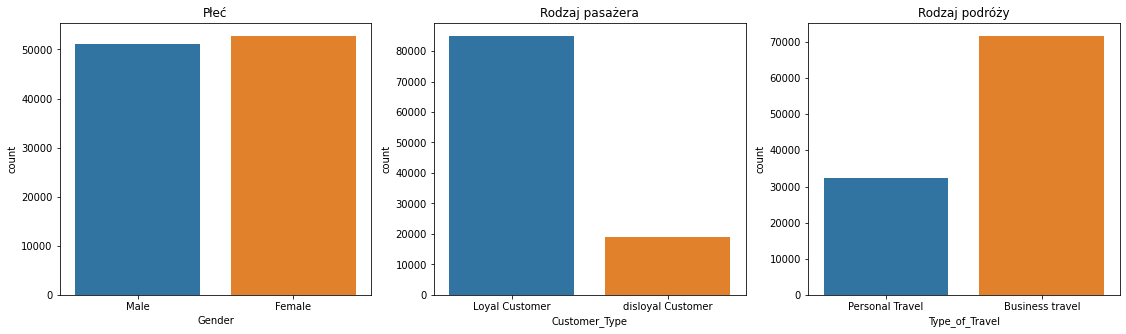

In [ ]:
fig,axes = plt.subplots(1,3,figsize = (19,5))
sns.countplot(ax=axes[0],x='Gender', data=train).set_title("Płeć")
sns.countplot(ax=axes[1],x='Customer_Type', data=train).set_title("Rodzaj pasażera")
sns.countplot(ax=axes[2],x='Type_of_Travel', data=train).set_title("Rodzaj podróży")


Jak widzimy, dataset zawiera podobną ilośc danych nt. pasażerów obu płci. Zdecydowana większość z nich to stali klienci. Większość podróży miała charakter biznesowy.

### Oceny poszczególnych czynników (w skali 1-5; 0 - brak danych)

Text(0.5, 1.0, 'Czystość')

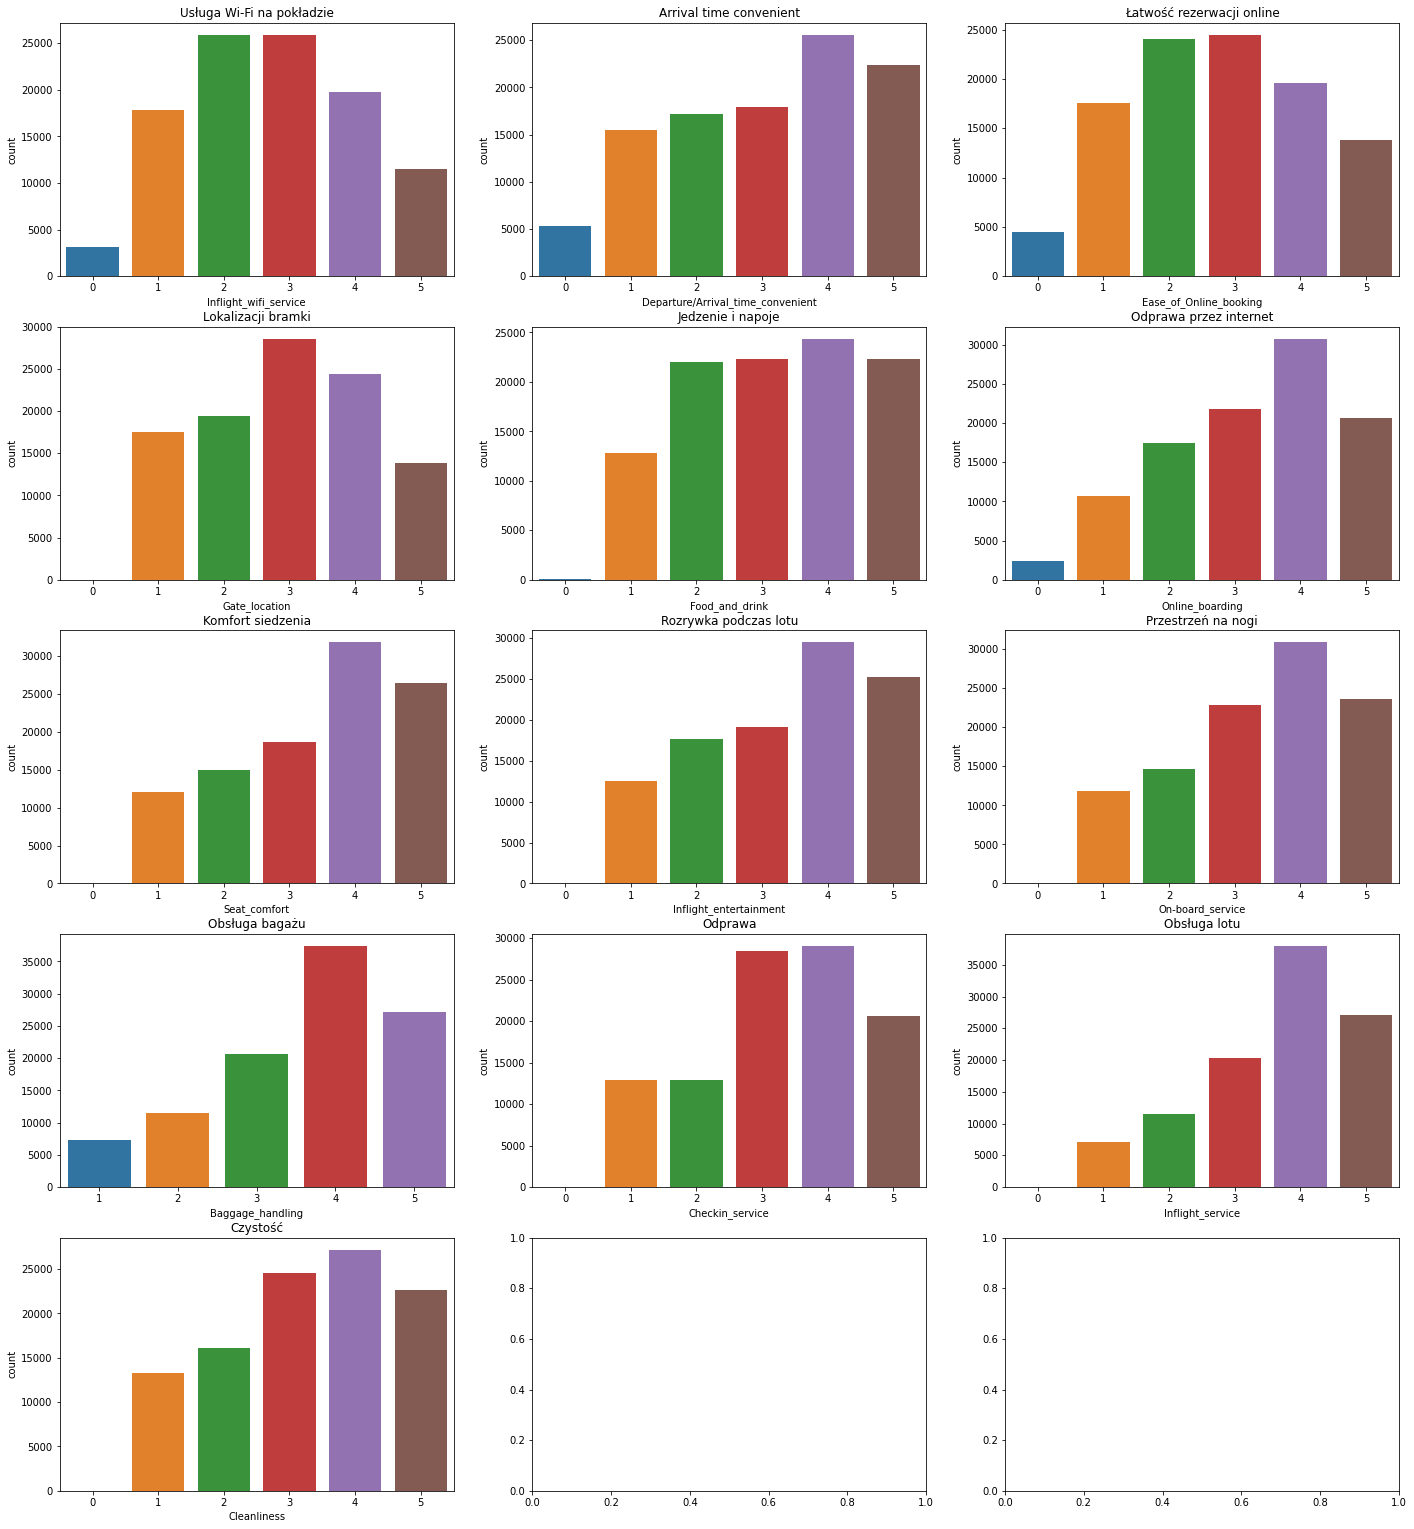

In [ ]:
fig,axes = plt.subplots(5,3,figsize = (24,27))
sns.countplot(ax=axes[0,0],x='Inflight_wifi_service', data=train).set_title("Usługa Wi-Fi na pokładzie")
sns.countplot(ax=axes[0,1],x='Departure/Arrival_time_convenient', data=train).set_title("Arrival time convenient")
sns.countplot(ax=axes[0,2],x='Ease_of_Online_booking', data=train).set_title("Łatwość rezerwacji online")
sns.countplot(ax=axes[1,0],x='Gate_location', data=train).set_title("Lokalizacji bramki")
sns.countplot(ax=axes[1,1],x='Food_and_drink', data=train).set_title("Jedzenie i napoje")
sns.countplot(ax=axes[1,2],x='Online_boarding', data=train).set_title("Odprawa przez internet")
sns.countplot(ax=axes[2,0],x='Seat_comfort', data=train).set_title("Komfort siedzenia")
sns.countplot(ax=axes[2,1],x='Inflight_entertainment', data=train).set_title("Rozrywka podczas lotu")
sns.countplot(ax=axes[2,2],x='On-board_service', data=train).set_title("Przestrzeń na nogi")
sns.countplot(ax=axes[3,0],x='Baggage_handling', data=train).set_title("Obsługa bagażu")
sns.countplot(ax=axes[3,1],x='Checkin_service', data=train).set_title("Odprawa")
sns.countplot(ax=axes[3,2],x='Inflight_service', data=train).set_title("Obsługa lotu")
sns.countplot(ax=axes[4,0],x='Cleanliness', data=train).set_title("Czystość")




## Dane liczbowe

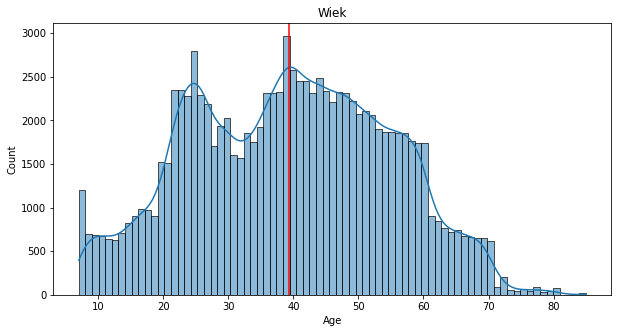

In [ ]:
fig = plt.figure(figsize = (10,5))
sns.histplot(train['Age'], kde="True", ax=fig.gca()).set_title("Wiek")
plt.axvline(train['Age'].mean(), color='red')

Dataset zawiera dane podróżników w wieku mniej więcej 8 - 85 lat. Zdecydowana większość pasaeżerów jest w wieku 20-70 lat. Średnia wieku to 39 lat.

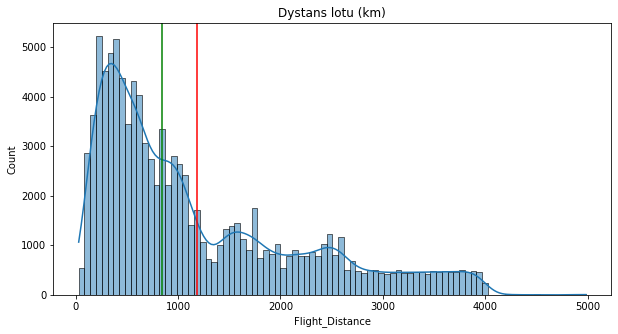

In [ ]:
fig = plt.figure(figsize = (10,5))
sns.histplot(train['Flight_Distance'], kde="True", ax=fig.gca()).set_title("Dystans lotu (km)")
plt.axvline(train['Flight_Distance'].mean(), color='red')
plt.axvline(train['Flight_Distance'].median(), color='green')

In [ ]:
print(train['Flight_Distance'].mean())
print(train['Flight_Distance'].median())

1189.4483754234677
843.0


Zdecydowana większość lotów była na dystansie mniejszym niż 1000km. Mediana dystansuu to 843 km.

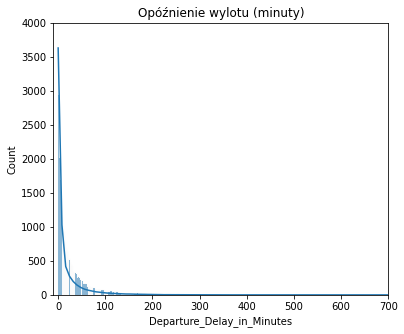

In [ ]:
fig = plt.figure(figsize = (6,5))
sns.histplot(train['Departure_Delay_in_Minutes'], kde="True", ax=fig.gca()).set_title("Opóźnienie wylotu (minuty)")
plt.xlim(-10, 700)
plt.ylim(0, 4000)
plt.show()

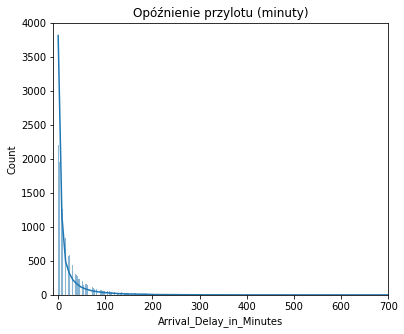

In [ ]:
fig = plt.figure(figsize = (6,5))
sns.histplot(train['Arrival_Delay_in_Minutes'], kde="True", ax=fig.gca()).set_title("Opóźnienie przylotu (minuty)")
plt.xlim(-10, 700)
plt.ylim(0, 4000)
plt.show()

### Etykiety - zbalansowanie danych

Text(0.5, 1.0, 'Zadowolenie z lotu')

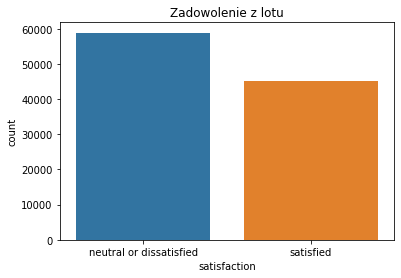

In [ ]:
sns.countplot(x='satisfaction', data=train).set_title("Zadowolenie z lotu")

In [ ]:
train['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

Dane są całkiem dobrze zbalansowane. Nie ma potrzeby ich balansowania.

## Dane kategoryczne vs Zadowolenie z lotu

Text(0.5, 1.0, 'Rodzaj podróży')

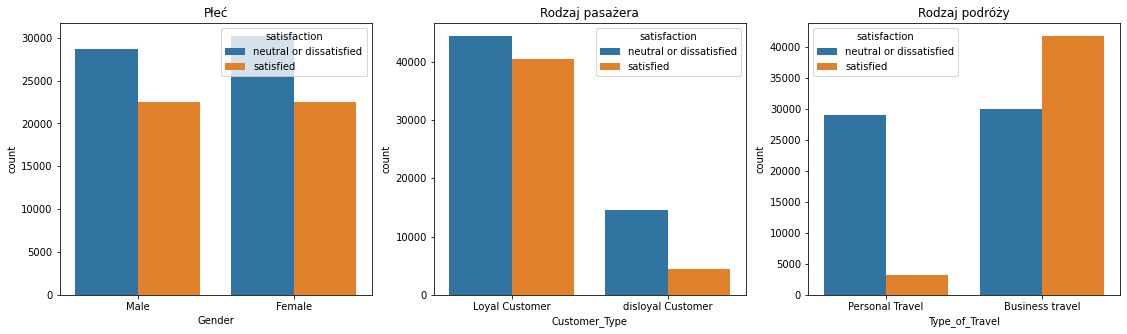

In [ ]:
fig,axes = plt.subplots(1,3,figsize = (19,5))
sns.countplot(ax=axes[0],x='Gender', hue="satisfaction", data=train).set_title("Płeć")
sns.countplot(ax=axes[1],x='Customer_Type',hue="satisfaction", data=train).set_title("Rodzaj pasażera")
sns.countplot(ax=axes[2],x='Type_of_Travel',hue="satisfaction", data=train).set_title("Rodzaj podróży")

**Wnioski**<br>
* Płeć zdaje się nie mieć wpływu na poziom zadowolenia.<br>
* Stali klienci częściej są zadowoleni, niż Ci nie stali<br>
* Klienci podróżujący służbowo byli zdecydowanie częściej zadowoleni od tych podróżujących prywatnie.

Text(0.5, 1.0, 'Czystość')

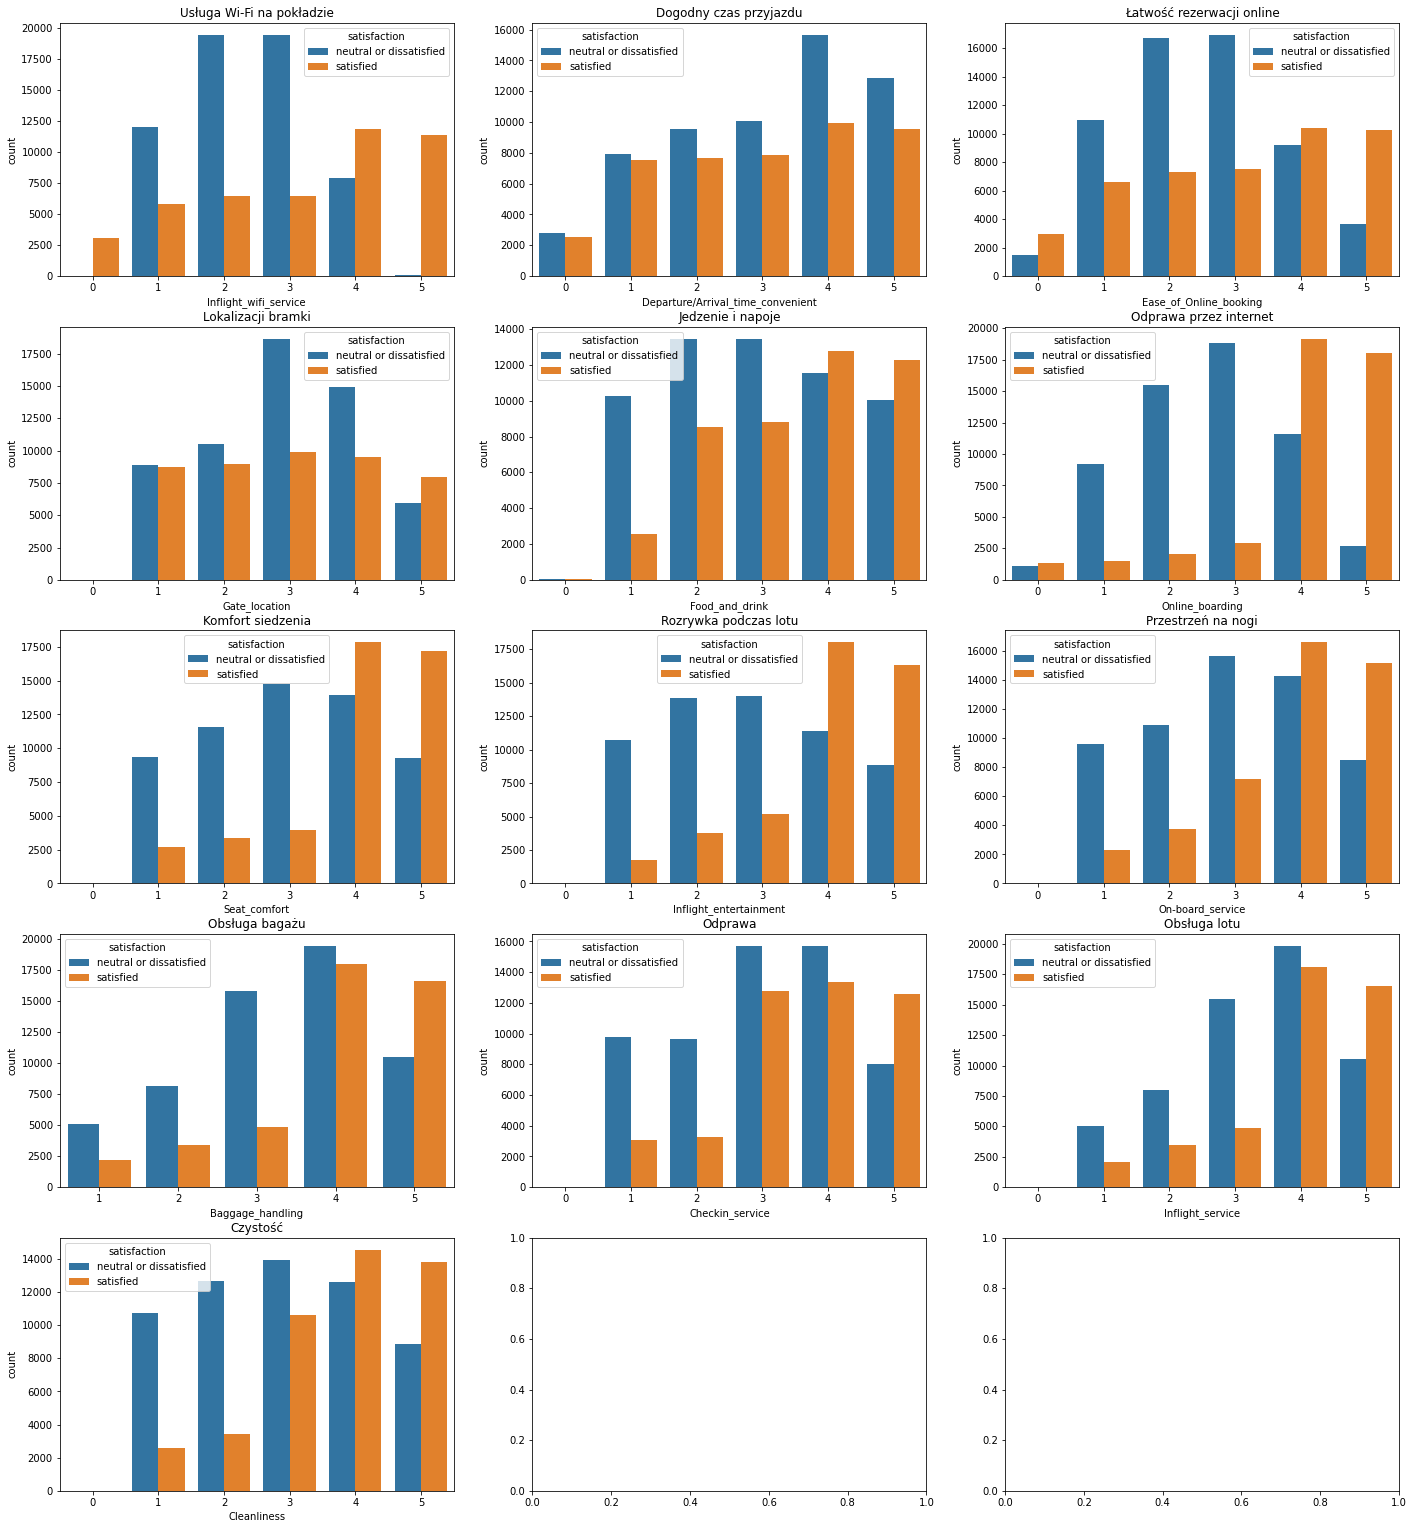

In [ ]:
fig,axes = plt.subplots(5,3,figsize = (24,27))
sns.countplot(ax=axes[0,0],x='Inflight_wifi_service', hue="satisfaction", data=train).set_title("Usługa Wi-Fi na pokładzie")
sns.countplot(ax=axes[0,1],x='Departure/Arrival_time_convenient', hue="satisfaction", data=train).set_title("Dogodny czas przyjazdu")
sns.countplot(ax=axes[0,2],x='Ease_of_Online_booking', hue="satisfaction", data=train).set_title("Łatwość rezerwacji online")
sns.countplot(ax=axes[1,0],x='Gate_location', hue="satisfaction", data=train).set_title("Lokalizacji bramki")
sns.countplot(ax=axes[1,1],x='Food_and_drink', hue="satisfaction", data=train).set_title("Jedzenie i napoje")
sns.countplot(ax=axes[1,2],x='Online_boarding', hue="satisfaction", data=train).set_title("Odprawa przez internet")
sns.countplot(ax=axes[2,0],x='Seat_comfort', hue="satisfaction", data=train).set_title("Komfort siedzenia")
sns.countplot(ax=axes[2,1],x='Inflight_entertainment', hue="satisfaction", data=train).set_title("Rozrywka podczas lotu")
sns.countplot(ax=axes[2,2],x='On-board_service', hue="satisfaction", data=train).set_title("Przestrzeń na nogi")
sns.countplot(ax=axes[3,0],x='Baggage_handling', hue="satisfaction", data=train).set_title("Obsługa bagażu")
sns.countplot(ax=axes[3,1],x='Checkin_service', hue="satisfaction", data=train).set_title("Odprawa")
sns.countplot(ax=axes[3,2],x='Inflight_service', hue="satisfaction", data=train).set_title("Obsługa lotu")
sns.countplot(ax=axes[4,0],x='Cleanliness', hue="satisfaction", data=train).set_title("Czystość")


**Wnioski**<br>
* Zadowolenie wzrasta wraz z jakością wifi na pokładzie
* Zadowoleniu sprzyja również zadowolenie z rezerwacji online
* Dogodny czas przylotu ma raczej niewielki wpływ na ogólne zadowolenie
* Odprawa przez internet bardzo sprzyja zwiększeniu ogólnego zadowolenia
* Tylko komfort siedzenia oceniony na 4 lub 5 sprzyja ogólnemu zadowoleniu, podobnie rozrywka w trakci lotu, przestrzeń na nogi, obsługa bagażu, obsługa lotu. 


## Dane liczbowe vs Zadowolenie z lotu

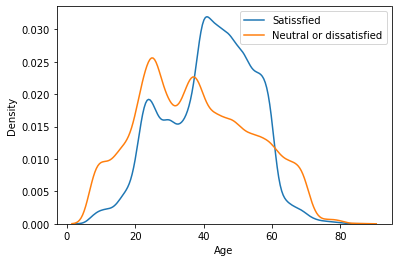

In [ ]:
sns.kdeplot(x=train.loc[train['satisfaction']=="satisfied"]['Age'],label='Satissfied')
sns.kdeplot(x=train.loc[train['satisfaction']=="neutral or dissatisfied"]['Age'],label='Neutral or dissatisfied')
plt.legend()
plt.show()

Szczególnie niezadowolenie z lotu wykazują osoby na przedziale 40-60 lat.

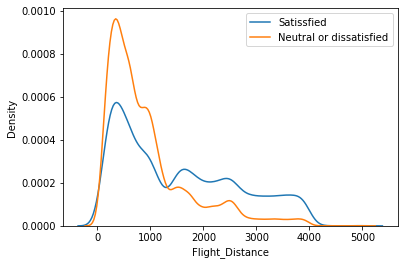

In [ ]:
sns.kdeplot(x=train.loc[train['satisfaction']=="satisfied"]['Flight_Distance'],label='Satissfied')
sns.kdeplot(x=train.loc[train['satisfaction']=="neutral or dissatisfied"]['Flight_Distance'],label='Neutral or dissatisfied')
plt.legend()
plt.show()

Co ciekawe, klienci na krótkich dystansach są częściej niezadowoleni, zaś na długich - zadowoleni. Granica występuje około 1200km.

In [ ]:
# plt.figure(figsize = (36,5))
# plt.xlim(0, 400)
# sns.kdeplot(x=train.loc[train['satisfaction']=="satisfied"]['Departure_Delay_in_Minutes'],label='Satissfied')
# sns.kdeplot(x=train.loc[train['satisfaction']=="neutral or dissatisfied"]['Departure_Delay_in_Minutes'],label='Neutral or dissatisfied')
# plt.legend()
# plt.show()

### Pierwszy rzut okna na korelację

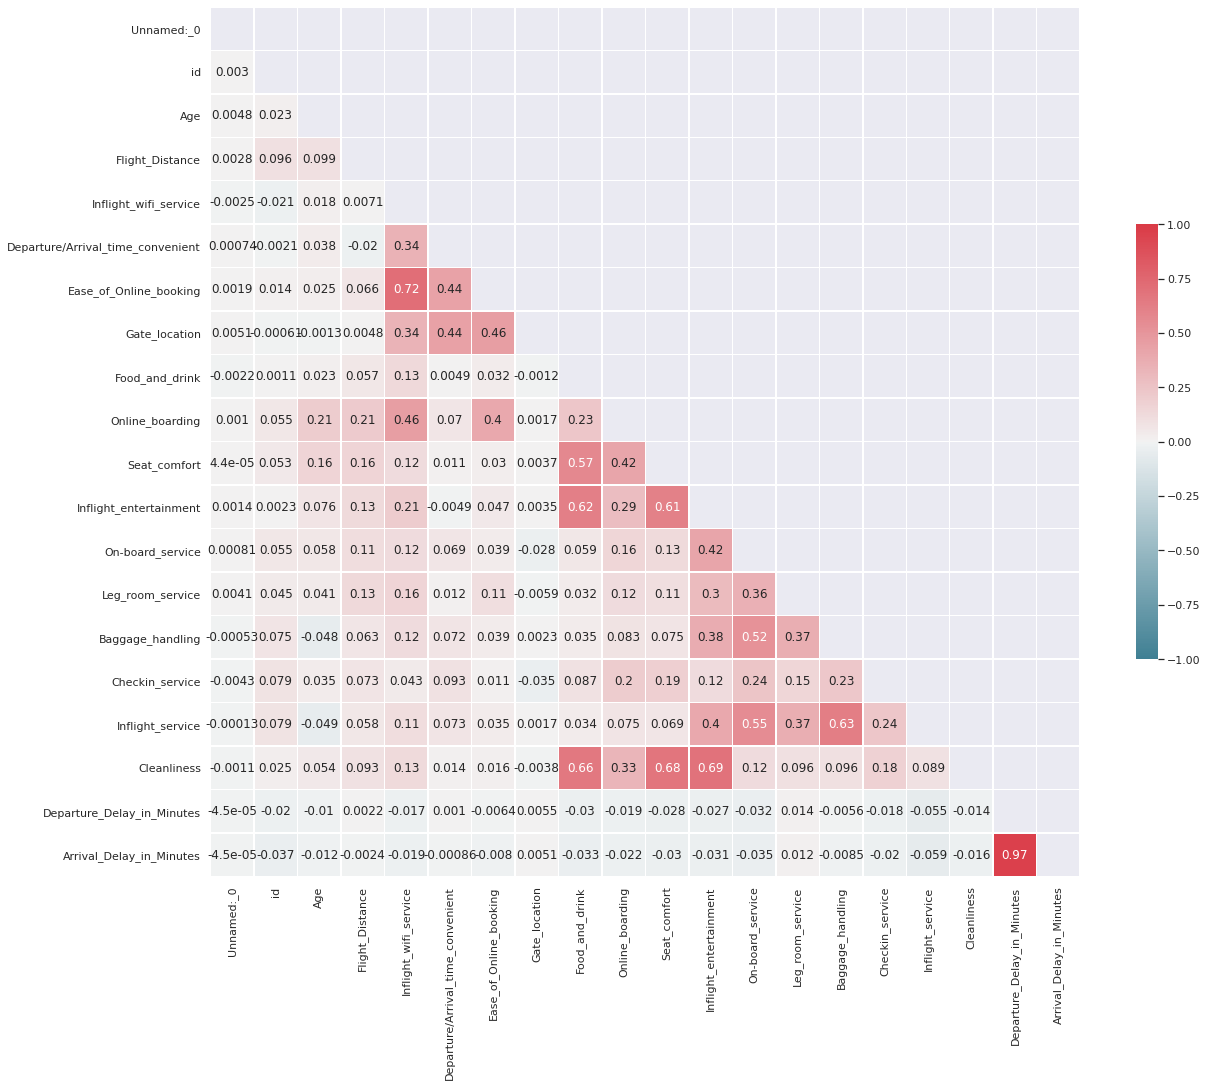

In [ ]:
sns.set(style="darkgrid")

corr = train.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(20, 16))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, annot=True,
            square=True, xticklabels=1, yticklabels=1,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

In [ ]:
train.describe()

,Unnamed:_0,id,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Przetwarzanie danych

Spójrzmy jeszcze raz na dane w poszczególnych kolumnach

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed:_0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer_Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type_of_Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight_Distance                    103904 non-null  int64  
 8   Inflight_wifi_service              103904 non-null  int64  
 9   Departure/Arrival_time_convenient  103904 non-null  int64  
 10  Ease_of_Online_booking             103904 non-null  int64  
 11  Gate_location                      1039

In [ ]:
print(train["Unnamed:_0"].nunique())
print(train["id"].nunique())

103904
103904


**Kolumny Unnamed:_0 i id są unikalne dla każdego wiersza, więc możemy je usunąć.**

In [ ]:
train.drop(columns=['id', "Unnamed:_0" ],inplace=True) 

In [ ]:
test.drop(columns=['id', "Unnamed:_0" ],inplace=True) 

In [ ]:
train.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


##Problem missing data

In [ ]:
train.isnull().sum()

Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310
satisfaction                           0
dtype: int64

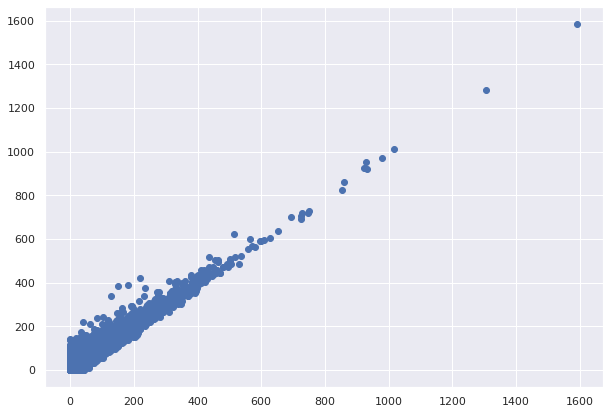

In [ ]:
fig = plt.figure(figsize = (10,7))
plt.scatter(train['Departure_Delay_in_Minutes'], train['Arrival_Delay_in_Minutes'])

Brakuje 310 wartości w kolumnie Arrival_Delay_in_Minutes. Z wykresu korelacji widzimy, że kolumna ta jest bardzo mocno (0.97) skorelowana z kolumną Departure_Delay_in_Minutes, więc możemy spróbować zamienić brakujące wartości w Arrival_Delay_in_Minutes możemy wypelnić wartościami z Departure_Delay_in_Minutes.

In [ ]:
train['Arrival_Delay_in_Minutes'].fillna(train['Departure_Delay_in_Minutes'], inplace = True)
test['Arrival_Delay_in_Minutes'].fillna(test['Departure_Delay_in_Minutes'], inplace = True)

In [ ]:
train.isnull().sum()

Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

Należy się przyjrzeć również kolumnom zawierającym oceny różnych czynników w skali 1-5. Niektóre z nich zawierają również 0, co według opisu oznacza brak danych / nie dotyczy.

In [ ]:
columns = ['Inflight_wifi_service','Departure/Arrival_time_convenient', 'Ease_of_Online_booking', 
           'Gate_location','Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 
           'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness']

In [ ]:
for column in columns:
  print(column + ": " + str(train[train[column] == 0].shape[0]) )


Inflight_wifi_service: 3103
Departure/Arrival_time_convenient: 5300
Ease_of_Online_booking: 4487
Gate_location: 1
Food_and_drink: 107
Online_boarding: 2428
Seat_comfort: 1
Inflight_entertainment: 14
On-board_service: 3
Baggage_handling: 0
Checkin_service: 1
Inflight_service: 3
Cleanliness: 12


Możemy usunąć dane, które posiadają mniej niż 150 brakujących wartości.

In [ ]:
for column in columns:
  if (train[train[column] == 0].shape[0] < 150) or  (test[test[column] == 0].shape[0] < 150):
    train = train[train[column] != 0]

Spójrzmy na pozostałe kolumny

In [ ]:
for column in columns:
  if train[train[column] == 0].shape[0] > 0:
    print(column + ": " + str(train[train[column] == 0].shape[0]) )

Inflight_wifi_service: 3048
Departure/Arrival_time_convenient: 5266
Ease_of_Online_booking: 4393
Online_boarding: 2428


## LabelEncoder

In [ ]:
train.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in ['Gender', 'Customer_Type', 'Type_of_Travel', 'satisfaction' ]:
  train[column] = label_encoder.fit_transform(train[column])
  test[column] = label_encoder.fit_transform(test[column])


In [ ]:
train.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,0,13,1,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


##One-hot encoding

In [ ]:
train["Class"].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [ ]:
one_hot = pd.get_dummies(train['Class'])
train = train.drop('Class',axis = 1)
train = train.join(one_hot)


In [ ]:
one_hot = pd.get_dummies(test['Class'])
test = test.drop('Class',axis = 1)
test = test.join(one_hot)

In [ ]:
train.head()

,Gender,Customer_Type,Age,Type_of_Travel,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Business,Eco,Eco Plus
0,1,0,13,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,0,0,1
1,1,1,25,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,1,0,0
2,0,0,26,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,1,0,0
3,0,0,25,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,1,0,0
4,1,0,61,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,1,0,0


## Spójrzmy ponownie na korelację

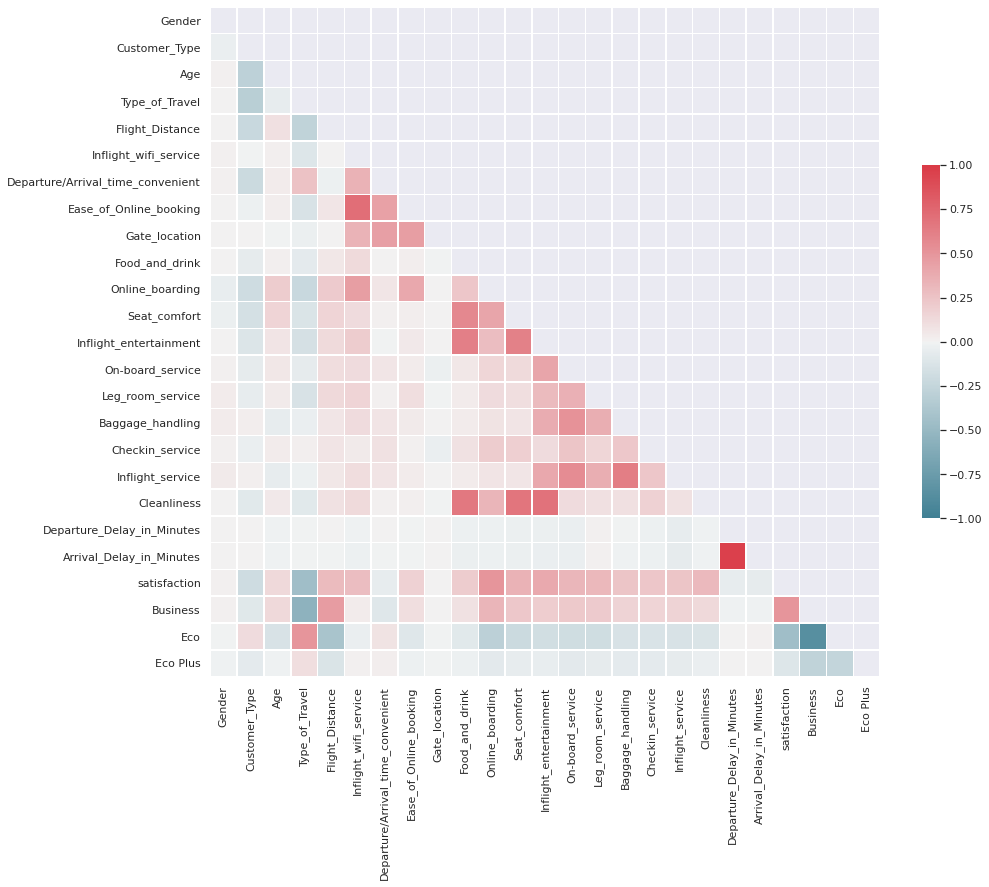

In [ ]:
sns.set(style="darkgrid")

corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=1, yticklabels=1,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

#Modelowanie danych

Dane już na Kagglu były podzielone na train i test/

In [ ]:
X_train = train.loc[:, train.columns != "satisfaction"]
y_train = train["satisfaction"]

X_test = test.loc[:, test.columns != "satisfaction"]
y_test = test["satisfaction"]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

##Modele
* Regresja Logistyczna
* Random Forests
* SVM - linear
* SVM - poly
* SVM - rbf
* Linear SVC
* Decision Trees
* Ada Boost
* Gradient Boost
* XG Boost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

## Regresja Logistyczna

In [ ]:
pipe_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(C=1, solver='newton-cg'))])


param_grid = {
            'scaler': [StandardScaler(), None],
            'classifier__C': [0.05, 0.1, 1, 10],
            
}

grid_1 = GridSearchCV(pipe_1, param_grid, cv=kfold, n_jobs=-1)

In [ ]:
grid_1.fit(X_train, y_train)
grid_1.best_params_

{'classifier__C': 0.1, 'scaler': None}

In [ ]:
model_1_preds = grid_1.best_estimator_.predict(X_test)
print("precision: {}".format(metrics.precision_score(y_test, model_1_preds)))
print("f1: {}".format(metrics.f1_score(y_test, model_1_preds)))
print("accuracy: {}".format(metrics.accuracy_score(y_test, model_1_preds)))


precision: 0.8695771554091158
f1: 0.8510009404809888
accuracy: 0.8719202340622113


#### Best score
{'classifier__C': 0.1, 'scaler': None}<br>

precision: 0.8695771554091158<br>
f1: 0.8510009404809888<br>
accuracy: 0.8719202340622113<br>

In [ ]:
logistic_regression_model = LogisticRegression(C= 0.1, solver='newton-cg')
logistic_regression_model.fit(X_train, y_train)
logistic_regression_model_preds = logistic_regression_model.predict(X_test)

print("precision: {}".format(metrics.precision_score(y_test, logistic_regression_model_preds)))
print("f1: {}".format(metrics.f1_score(y_test, logistic_regression_model_preds)))
print("accuracy: {} \n".format(metrics.accuracy_score(y_test, logistic_regression_model_preds)))
print('Classification report : \n' + str(classification_report(logistic_regression_model_preds, y_test)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,logistic_regression_model_preds)))

precision: 0.8695771554091158
f1: 0.8510009404809888
accuracy: 0.8719202340622113 

Classification report : 
              precision    recall  f1-score   support

           0       0.90      0.87      0.89     15050
           1       0.83      0.87      0.85     10926

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976

Confusion Matrix : 
[[13148  1425]
 [ 1902  9501]]


## Random Forests

In [ ]:
pipe_2 = Pipeline([
                   ('scaler', StandardScaler()), 
                   ('classifier', RandomForestClassifier(n_estimators=200, max_leaf_nodes=800, 
                                                         max_depth=30, min_samples_leaf=2))
                  ])

param_grid_2 = {
              'scaler': [StandardScaler(), None],
              'classifier__min_samples_leaf': [1, 2, 4],  
              'classifier__n_estimators': [20, 30, 50],
              'classifier__max_leaf_nodes': [300, 500, 600],
              'classifier__max_depth': [10, 30, 40]
             }

grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold, return_train_score=True, n_jobs=-1, verbose=10)

In [ ]:
grid_2.fit(X_train, y_train)
grid_2.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'classifier__max_depth': 30,
 'classifier__max_leaf_nodes': 500,
 'classifier__min_samples_leaf': 1,
 'classifier__n_estimators': 50,
 'scaler': StandardScaler()}

In [ ]:
model_2_preds = grid_2.best_estimator_.predict(X_test)
print("precision: {}".format(metrics.precision_score(y_test, model_2_preds)))
print("f1: {}".format(metrics.f1_score(y_test, model_2_preds)))
print("accuracy: {}".format(metrics.accuracy_score(y_test, model_2_preds)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,model_2_preds)))

precision: 0.9607612143180788
f1: 0.9450040110526785
accuracy: 0.9524946104096089
Confusion Matrix : 
[[14140   433]
 [  801 10602]]


##### Best score
{'classifier__max_depth': 30,<br>
 'classifier__max_leaf_nodes': 800,<br>
 'classifier__min_samples_leaf': 2,<br>
 'classifier__n_estimators': 200,<br>
 'scaler': StandardScaler()}<br>

precision: 0.9607612143180788<br>
f1: 0.9450040110526785<br>
accuracy: 0.9524946104096089<br>

In [ ]:
random_forests_model = pipe_2.fit(X_train, y_train)
random_forests_model_preds = random_forests_model.predict(X_test)

print("precision: {}".format(metrics.precision_score(y_test, random_forests_model_preds)))
print("f1: {}".format(metrics.f1_score(y_test, random_forests_model_preds)))
print("accuracy: {} \n".format(metrics.accuracy_score(y_test, random_forests_model_preds)))
print('Classification report : \n' + str(classification_report(random_forests_model_preds, y_test)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,random_forests_model_preds)))

precision: 0.9628121606948968
f1: 0.9477621910487642
accuracy: 0.9548429319371727 

Classification report : 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     14924
           1       0.93      0.96      0.95     11052

    accuracy                           0.95     25976
   macro avg       0.95      0.96      0.95     25976
weighted avg       0.96      0.95      0.95     25976

Confusion Matrix : 
[[14162   411]
 [  762 10641]]


## SVM - linear

###### From scikit-learn documentation: 
The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples. For large datasets consider using sklearn.linear_model.LinearSVC or sklearn.linear_model.SGDClassifier instead, possibly after a sklearn.kernel_approximation.Nystroem transformer.

In [ ]:
pipe_3 = Pipeline([
                   ('scaler', StandardScaler()), 
                   ('classifier', (SVC(kernel="linear", max_iter=6000, )))
                  ])

param_grid_3 = {
              'classifier__C': [ 1, 5, 10, 20]
             }

grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True, n_jobs=-1, verbose=10)

In [ ]:
grid_3.fit(X_train, y_train)
grid_3.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=6000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


{'classifier__C': 20}

In [ ]:
model_3_preds = grid_3.best_estimator_.predict(X_test)
print("precision: {}".format(metrics.precision_score(y_test, model_3_preds)))
print("f1: {}".format(metrics.f1_score(y_test, model_3_preds)))
print("accuracy: {}".format(metrics.accuracy_score(y_test, model_3_preds)))

precision: 0.5568189159506428
f1: 0.6412469310319173
accuracy: 0.6287342161995688


#### SVM - linear, bez Grida

In [ ]:
svm_linear_model = pipe_3.fit(X_train, y_train)
svm_linear_model_preds = svm_linear_model.predict(X_test)

print("precision: {}".format(metrics.precision_score(y_test, svm_linear_model_preds)))
print("f1: {}".format(metrics.f1_score(y_test, svm_linear_model_preds)))
print("accuracy: {} \n".format(metrics.accuracy_score(y_test, svm_linear_model_preds)))
print('Classification report : \n' + str(classification_report(svm_linear_model_preds, y_test)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test, svm_linear_model_preds)))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=6000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


precision: 0.6214643807637557
f1: 0.7286647314949202
accuracy: 0.7121188789651987 

Classification report : 
              precision    recall  f1-score   support

           0       0.58      0.86      0.69      9819
           1       0.88      0.62      0.73     16157

    accuracy                           0.71     25976
   macro avg       0.73      0.74      0.71     25976
weighted avg       0.77      0.71      0.72     25976

Confusion Matrix : 
[[ 8457  6116]
 [ 1362 10041]]


## SVM - poly

In [ ]:
pipe_4 = Pipeline([
                   ('scaler', StandardScaler()), 
                   ('classifier', SVC(kernel="poly", max_iter=5000, degree=5, C=0.1))
                  ])

param_grid_4 = {
              'scaler': [StandardScaler(), None],
              'classifier__C': [0.01, 0.1, 1],
             'classifier__coef0': [0.01, 0.1, 1, 10],
             'classifier__degree': [1, 2, 3, 4, 5, 6]
             }

grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True, n_jobs=-1, verbose=1)

In [ ]:
grid_4.fit(X_train, y_train)
grid_4.best_params_

In [ ]:
model_4_preds = grid_4.best_estimator_.predict(X_test)
print("precision: {}".format(metrics.precision_score(y_test, model_4_preds)))
print("f1: {}".format(metrics.f1_score(y_test, model_4_preds)))
print("accuracy: {}".format(metrics.accuracy_score(y_test, model_4_preds)))

### SVM - poly bez Gridowania

In [ ]:
svm_poly_model = pipe_4.fit(X_train, y_train)
svm_poly_model_preds = svm_poly_model.predict(X_test)

print("precision: {}".format(metrics.precision_score(y_test, svm_poly_model_preds)))
print("f1: {}".format(metrics.f1_score(y_test, svm_poly_model_preds)))
print("accuracy: {} \n".format(metrics.accuracy_score(y_test, svm_poly_model_preds)))
print('Classification report : \n' + str(classification_report(svm_poly_model_preds, y_test)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test, svm_poly_model_preds)))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


precision: 0.439015939015939
f1: 0.6101613291596436
accuracy: 0.43905913150600556 

Classification report : 
              precision    recall  f1-score   support

           0       0.00      1.00      0.00         2
           1       1.00      0.44      0.61     25974

    accuracy                           0.44     25976
   macro avg       0.50      0.72      0.31     25976
weighted avg       1.00      0.44      0.61     25976

Confusion Matrix : 
[[    2 14571]
 [    0 11403]]


## SVM - rbf

In [ ]:
from sklearn.svm import SVR
from sklearn import preprocessing
pipe_5 = Pipeline([
                   ('scaler', StandardScaler()), 
                   ('classifier', SVC(kernel="rbf", max_iter=5000))
                  ])

param_grid_5 = {
              'classifier__C': [0.001, 0.001, 0.1],
              'classifier__gamma': [0.01, 0.1, 1]
             }

grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True, n_jobs=-1, verbose=10)

In [ ]:
grid_5.fit(X_train, y_train)
grid_5.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


{'classifier__C': 1, 'classifier__gamma': 0.1}

In [ ]:
model_5_preds = grid_5.best_estimator_.predict(X_test)
print("precision: {}".format(metrics.precision_score(y_test, model_5_preds)))
print("f1: {}".format(metrics.f1_score(y_test, model_5_preds)))
print("accuracy: {}".format(metrics.accuracy_score(y_test, model_5_preds)))

precision: 0.9372392365734576
f1: 0.9315334392094583
accuracy: 0.9402525408068987


### SVM - rbf bez Gridowania

In [ ]:
svm_rbf_model = pipe_5.fit(X_train, y_train)
svm_rbf_model_preds = svm_rbf_model.predict(X_test)

print("precision: {}".format(metrics.precision_score(y_test, svm_rbf_model_preds)))
print("f1: {}".format(metrics.f1_score(y_test, svm_rbf_model_preds)))
print("accuracy: {} \n".format(metrics.accuracy_score(y_test, svm_rbf_model_preds)))
print('Classification report : \n' + str(classification_report(svm_rbf_model_preds, y_test)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test, svm_rbf_model_preds)))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


precision: 0.9251139196973605
f1: 0.9342710775375532
accuracy: 0.9417154296273483 

Classification report : 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14345
           1       0.94      0.93      0.93     11631

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976

Confusion Matrix : 
[[13702   871]
 [  643 10760]]


## Linear SVC

In [ ]:
pipe_6 = Pipeline([
                   ('scaler', StandardScaler()), 
                   ('classifier', LinearSVC(C=0.1))
                  ])

param_grid_6 = {
              'scaler': [StandardScaler(), None],
              'classifier__C': [0.01, 0.05, 0.1, 1, 10]
             }

grid_6 = GridSearchCV(pipe_6, param_grid_6, cv=kfold, return_train_score=True, n_jobs=-1, verbose=1)

In [ ]:
grid_6.fit(X_train, y_train)
grid_6.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  4.4min finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'classifier__C': 0.1,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [ ]:
model_6_preds = grid_6.best_estimator_.predict(X_test)
print("precision: {}".format(metrics.precision_score(y_test, model_6_preds)))
print("f1: {}".format(metrics.f1_score(y_test, model_6_preds)))
print("accuracy: {}".format(metrics.accuracy_score(y_test, model_6_preds)))

AttributeError: ignored

#### Best score

{'classifier__C': 0.1,<br>
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}<br>
 precision: 0.8693577981651376<br>
f1: 0.849751154553199<br>
accuracy: 0.8709963042808746<br>

In [ ]:
linearSVC_model = pipe_6.fit(X_train, y_train)
linearSVC_model_preds = linearSVC_model.predict(X_test)

print("precision: {}".format(metrics.precision_score(y_test, linearSVC_model_preds)))
print("f1: {}".format(metrics.f1_score(y_test, linearSVC_model_preds)))
print("accuracy: {} \n".format(metrics.accuracy_score(y_test, linearSVC_model_preds)))
print('Classification report : \n' + str(classification_report(linearSVC_model_preds, y_test)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,linearSVC_model_preds)))

precision: 0.8691820435141834
f1: 0.8493003229278794
accuracy: 0.8706498306128734 

Classification report : 
              precision    recall  f1-score   support

           0       0.90      0.87      0.89     15083
           1       0.83      0.87      0.85     10893

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976

Confusion Matrix : 
[[13148  1425]
 [ 1935  9468]]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Decision Tree

In [ ]:
pipe_7 = Pipeline([
                   ('scaler', StandardScaler()), 
                   ('classifier', DecisionTreeClassifier())
                  ])
pipeline_7 = Pipeline([('preprocessing', StandardScaler()), ('classifier', DecisionTreeClassifier())])

param_grid_7 = {
            'scaler': [StandardScaler(), None],
            'classifier__criterion': ['gini', 'entropy'],  
            'classifier__max_depth': [35, 50, 100, 150, 250],
            'classifier__max_leaf_nodes': [100, 150, 350, 500, 600],
}

grid_7 = GridSearchCV(pipe_7, param_grid_7, cv=kfold, return_train_score=True, verbose=10, n_jobs=-1)


In [ ]:
grid_7.fit(X_train, y_train)
grid_7.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'classifier__criterion': 'entropy',
 'classifier__max_depth': 150,
 'classifier__max_leaf_nodes': 350,
 'scaler': None}

In [ ]:
model_7_preds = grid_7.best_estimator_.predict(X_test)
print("precision: {}".format(metrics.precision_score(y_test, model_7_preds)))
print("f1: {}".format(metrics.f1_score(y_test, model_7_preds)))
print("accuracy: {}".format(metrics.accuracy_score(y_test, model_7_preds)))

precision: 0.9732085512432334
f1: 0.9512151376558157
accuracy: 0.9581151832460733


##### Best score
{'classifier__criterion': 'entropy',<br>
 'classifier__max_depth': 150,<br>
 'classifier__max_leaf_nodes': 350,<br>
 'scaler': None}<br>

precision: 0.9732085512432334<br>
f1: 0.9512151376558157<br>
accuracy: 0.9581151832460733<br>

In [ ]:
decision_tree_model = DecisionTreeClassifier(criterion= 'entropy', max_depth=150, max_leaf_nodes=350)
decision_tree_model.fit(X_train, y_train)
decision_tree_model_preds = decision_tree_model.predict(X_test)

print("precision: {}".format(metrics.precision_score(y_test, decision_tree_model_preds)))
print("f1: {}".format(metrics.f1_score(y_test, decision_tree_model_preds)))
print("accuracy: {} \n".format(metrics.accuracy_score(y_test, decision_tree_model_preds)))
print('Classification report : \n' + str(classification_report(decision_tree_model_preds, y_test)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test, decision_tree_model_preds)))

precision: 0.9731217319511971
f1: 0.9512195121951219
accuracy: 0.9581151832460733 

Classification report : 
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     15075
           1       0.93      0.97      0.95     10901

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Confusion Matrix : 
[[14280   293]
 [  795 10608]]


## K-nearest neighbors 


In [ ]:
pipe_8 = Pipeline([
                   ('scaler', StandardScaler()), 
                   ('classifier', KNeighborsClassifier())
                  ])

param_grid_8 = {
              'classifier__p': [1, 10, 100],
             'classifier__n_neighbors': [3,5,9,11,19],
             'classifier__metric': ['euclidean','minkowski', 'manhattan']
                    }

grid_8 = GridSearchCV(pipe_8, param_grid_8, cv=kfold, return_train_score=True, n_jobs=-1, verbose=10)

In [ ]:
grid_8.fit(X_train, y_train)
grid_8.best_params_

In [ ]:
model_8_preds = grid_8.best_estimator_.predict(X_test)
print("precision: {}".format(metrics.precision_score(y_test, model_8_preds)))
print("f1: {}".format(metrics.f1_score(y_test, model_8_preds)))
print("accuracy: {}".format(metrics.accuracy_score(y_test, model_8_preds)))

##### Why should we not use the KNN algorithm for large datasets?
Here is an overview of the data flow that occurs in the KNN algorithm:
* Calculate the distances to all vectors in a training set and store them
* Sort the calculated distances
* Store the K nearest vectors
* Calculate the most frequent class displayed by K nearest vectors

## Ada Boost

In [ ]:

pipe_9 = Pipeline([
                   ('scaler', StandardScaler()), 
                   ('classifier', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=100, 
                                                                                           max_leaf_nodes=100), learning_rate=0.1, n_estimators=50))
                  ])

param_grid_9 = {
#                 'scaler': [StandardScaler(), None],
                'classifier__base_estimator__max_depth': [50, 100, 150, 200],
                'classifier__base_estimator__max_leaf_nodes': [50,100, 200, 300],
                  'classifier__n_estimators' : [10, 50, 100, 500],
                'classifier__learning_rate' : [ 0.01, 0.1, 1, 5,]
                    }

grid_9 = GridSearchCV(pipe_9, param_grid_9, cv=kfold, return_train_score=True, n_jobs=-1, verbose=10)

In [ ]:
grid_9.fit(X_train, y_train)
grid_9.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'classifier__base_estimator__max_depth': 100,
 'classifier__base_estimator__max_leaf_nodes': 100,
 'classifier__learning_rate': 0.1,
 'classifier__n_estimators': 50}

In [ ]:
model_9_preds = grid_9.best_estimator_.predict(X_test)
print("precision: {}".format(metrics.precision_score(y_test, model_9_preds)))
print("f1: {}".format(metrics.f1_score(y_test, model_9_preds)))
print("accuracy: {}".format(metrics.accuracy_score(y_test, model_9_preds)))

precision: 0.9771548193319377
f1: 0.958999553372041
accuracy: 0.9646596858638743


##### Best score
{'classifier__base_estimator__max_depth': 100,<br>
 'classifier__base_estimator__max_leaf_nodes': 100,<br>
 'classifier__learning_rate': 0.1,<br>
 'classifier__n_estimators': 50}<br>
 
precision: 0.9771548193319377<br>
f1: 0.958999553372041<br>
accuracy: 0.9646596858638743<br>

In [ ]:
adaBoost_model = pipe_9.fit(X_train, y_train)
adaBoost_model_preds = adaBoost_model.predict(X_test)

print("precision: {}".format(metrics.precision_score(y_test, adaBoost_model_preds)))
print("f1: {}".format(metrics.f1_score(y_test, adaBoost_model_preds)))
print("accuracy: {} \n".format(metrics.accuracy_score(y_test, adaBoost_model_preds)))
print('Classification report : \n' + str(classification_report(adaBoost_model_preds, y_test)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,adaBoost_model_preds)))

precision: 0.9771548193319377
f1: 0.958999553372041
accuracy: 0.9646596858638743 

Classification report : 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     14989
           1       0.94      0.98      0.96     10987

    accuracy                           0.96     25976
   macro avg       0.96      0.97      0.96     25976
weighted avg       0.97      0.96      0.96     25976

Confusion Matrix : 
[[14322   251]
 [  667 10736]]


## Gradient Boost

In [ ]:
pipe_10 = Pipeline([
                   ('scaler', StandardScaler()), 
                   ('classifier', GradientBoostingClassifier(learning_rate=0.1,n_estimators=1000 ))
                  ])

param_grid_10 = {
                'scaler': [StandardScaler(), None],
              'classifier__n_estimators' : [50, 100, 500],
            'classifier__learning_rate' : [0.01, 0.1,  1, 10]
                    }

grid_10 = GridSearchCV(pipe_10, param_grid_10, cv=kfold, return_train_score=True, n_jobs=-1, verbose=10)

In [ ]:
grid_10.fit(X_train, y_train)
grid_10.best_params_

#### Best score

{'classifier__learning_rate': 0.1,
 'classifier__n_estimators': 1000,
 'scaler': StandardScaler()}<br>
 precision: 0.9686147186147186<br>
f1: 0.955048686141123<br>
accuracy: 0.961079457961195<br>

In [ ]:
gradientBoost_model = pipe_10.fit(X_train, y_train)
gradientBoost_model_preds = gradientBoost_model.predict(X_test)

print("precision: {}".format(metrics.precision_score(y_test, gradientBoost_model_preds)))
print("f1: {}".format(metrics.f1_score(y_test, gradientBoost_model_preds)))
print("accuracy: {} \n".format(metrics.accuracy_score(y_test, gradientBoost_model_preds)))
print('Classification report : \n' + str(classification_report(gradientBoost_model_preds, y_test)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,gradientBoost_model_preds)))

precision: 0.9681235325988803
f1: 0.9539529296614316
accuracy: 0.9601555281798583 

Classification report : 
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     14902
           1       0.94      0.97      0.95     11074

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Confusion Matrix : 
[[14220   353]
 [  682 10721]]


## XGBoost

In [ ]:
import xgboost
from scipy.stats.distributions import uniform, randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



# param_grid_11 = {
#     # 'max_depth': [3, 5, 8, 10],
#     #'learning_rate': [0.01, 0.05, 0.1],
#     # 'n_estimators': [50, 100, 150, 200, 400]
#     # 'gamma': [0, 0.5, 1, 2],
#     # 'colsample_bytree': [1, 0.8, 0.5],
#     # 'subsample': [1, 0.8, 0.5],
#     # 'min_child_weight': [1, 5, 10]
# }


pipe_11 = Pipeline([
                   ('scaler', StandardScaler()), 
                   ('classifier', xgboost.XGBClassifier(random_state=42, learning_rate=0.1, n_estimators=500))
                  ])

param_grid_11 = {
                'scaler': [StandardScaler(), None],
                'classifier__n_estimators' : [50, 100, 200, 500, 1000],
                'classifier__learning_rate' : [0.01, 0.1,  1, 10]
                    }


# grid_11 = RandomizedSearchCV(
#     n_iter=300, estimator=pipe_11, 
#     cv=kfold, 
#     param_distributions=param_distribution,
#     return_train_score=True
# )

grid_11 = GridSearchCV(pipe_11, param_grid_11, cv=kfold, return_train_score=True, n_jobs=-1, verbose=10)


In [ ]:
grid_11.fit(X_train, y_train)
grid_11.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 16

{'classifier__learning_rate': 0.1,
 'classifier__n_estimators': 500,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

#### Best score
{'classifier__learning_rate': 0.1,<br>
 'classifier__n_estimators': 500,<br>
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}<br>
<br>
precision: 0.9681235325988803<br>
f1: 0.9539529296614316<br>
accuracy: 0.9601555281798583<br

In [ ]:
xgBoost_model = pipe_11.fit(X_train, y_train)
xgBoost_model_preds = xgBoost_model.predict(X_test)

print("precision: {}".format(metrics.precision_score(y_test, xgBoost_model_preds)))
print("f1: {}".format(metrics.f1_score(y_test, xgBoost_model_preds)))
print("accuracy: {} \n".format(metrics.accuracy_score(y_test, xgBoost_model_preds)))
print('Classification report : \n' + str(classification_report(xgBoost_model_preds, y_test)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test, xgBoost_model_preds)))

precision: 0.9662302483069978
f1: 0.9521309725064508
accuracy: 0.9585771481367416 

Classification report : 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     14901
           1       0.94      0.97      0.95     11075

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Confusion Matrix : 
[[14199   374]
 [  702 10701]]


# Sieć neuronowa

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Dropout
from keras.callbacks import History

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(72654, 24) (72654,)
(31138, 24) (31138,)


In [ ]:
history_Adam = History()
model = Sequential()
model.add(Dense(100, use_bias=False,input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Dropout(0.3))
model.add(Dense(50, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Dropout(0.3))
model.add(Dense(10, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Dropout(0.3))
model.add(Dense(1,activation="sigmoid"))
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2400      
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5000      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [ ]:
history =model.fit(X_train, y_train, validation_data= (X_valid, y_valid), batch_size=32,epochs=125)

Epoch 1/125
2271/2271 [==============================] - 30s 4ms/step - loss: 0.5234 - accuracy: 0.7555 - val_loss: 0.3235 - val_accuracy: 0.8718
Epoch 2/125
2271/2271 [==============================] - 8s 4ms/step - loss: 0.3762 - accuracy: 0.8508 - val_loss: 0.3352 - val_accuracy: 0.8648
Epoch 3/125
2271/2271 [==============================] - 8s 4ms/step - loss: 0.3627 - accuracy: 0.8553 - val_loss: 0.3047 - val_accuracy: 0.8789
Epoch 4/125
2271/2271 [==============================] - 8s 4ms/step - loss: 0.3441 - accuracy: 0.8630 - val_loss: 0.2942 - val_accuracy: 0.8787
Epoch 5/125
2271/2271 [==============================] - 8s 4ms/step - loss: 0.3213 - accuracy: 0.8699 - val_loss: 0.2789 - val_accuracy: 0.8791
Epoch 6/125
2271/2271 [==============================] - 8s 3ms/step - loss: 0.3041 - accuracy: 0.8741 - val_loss: 0.2224 - val_accuracy: 0.9069
Epoch 7/125
2271/2271 [==============================] - 8s 3ms/step - loss: 0.2857 - accuracy: 0.8841 - val_loss: 0.2368 - val_a

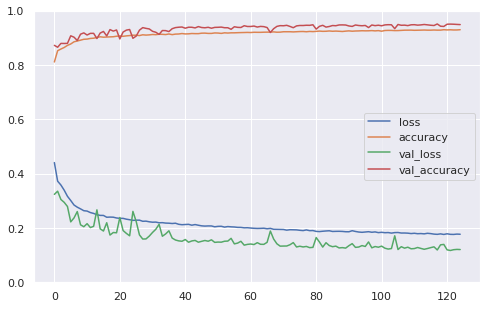

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
test_eval = model.evaluate(X_test,y_test)
test_eval

812/812 [==============================] - 1s 1ms/step - loss: 0.1230 - accuracy: 0.9473


[0.12299396842718124, 0.9472975134849548]

In [ ]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score, f1_score, confusion_matrix
y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[14083   490]
 [  879 10524]]
Accuracy:  0.9472975053895903
f1 score:  0.9389302761297229


# Podsumowanie wynikwów i porównanie modeli

In [ ]:
models = [logistic_regression_model_preds, random_forests_model_preds, svm_linear_model_preds, svm_poly_model_preds, svm_rbf_model_preds, linearSVC_model_preds, decision_tree_model_preds, adaBoost_model_preds, gradientBoost_model_preds]

In [ ]:
logistic_regression_df = pd.DataFrame(data=[metrics.f1_score(y_test, logistic_regression_model_preds), metrics.accuracy_score(y_test, logistic_regression_model_preds),
                                            metrics.recall_score(y_test, logistic_regression_model_preds), metrics.precision_score(y_test, logistic_regression_model_preds ), 
                                            metrics.roc_auc_score(y_test, logistic_regression_model_preds)],
                                      columns=['Logistic Regresion Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])


svm_linear_df = pd.DataFrame(data=[metrics.f1_score(y_test, svm_linear_model_preds), metrics.accuracy_score(y_test, svm_linear_model_preds),
                                            metrics.recall_score(y_test, svm_linear_model_preds), metrics.precision_score(y_test, svm_linear_model_preds ), 
                                            metrics.roc_auc_score(y_test, svm_linear_model_preds)],
                                      columns=['SVM linear kernel Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

svm_poly_df = pd.DataFrame(data=[metrics.f1_score(y_test, svm_poly_model_preds), metrics.accuracy_score(y_test, svm_poly_model_preds),
                                            metrics.recall_score(y_test, svm_poly_model_preds), metrics.precision_score(y_test, svm_poly_model_preds ), 
                                            metrics.roc_auc_score(y_test, svm_poly_model_preds)],
                                      columns=['SVM poly kernel Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])


svm_rbf_df = pd.DataFrame(data=[metrics.f1_score(y_test, svm_rbf_model_preds), metrics.accuracy_score(y_test, svm_rbf_model_preds),
                                            metrics.recall_score(y_test, svm_rbf_model_preds), metrics.precision_score(y_test, svm_rbf_model_preds ), 
                                            metrics.roc_auc_score(y_test, svm_rbf_model_preds)],
                                      columns=['SVM rbf kernel Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])


random_forests_df = pd.DataFrame(data=[metrics.f1_score(y_test, random_forests_model_preds), metrics.accuracy_score(y_test, random_forests_model_preds),
                                            metrics.recall_score(y_test, random_forests_model_preds), metrics.precision_score(y_test, random_forests_model_preds ), 
                                            metrics.roc_auc_score(y_test, random_forests_model_preds)],
                                      columns=['Random Forests Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

decision_tree_df = pd.DataFrame(data=[metrics.f1_score(y_test, decision_tree_model_preds), metrics.accuracy_score(y_test, decision_tree_model_preds),
                                            metrics.recall_score(y_test, decision_tree_model_preds), metrics.precision_score(y_test, decision_tree_model_preds ), 
                                            metrics.roc_auc_score(y_test, decision_tree_model_preds)],
                                      columns=['Decision Tree Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
linearSVC_df = pd.DataFrame(data=[metrics.f1_score(y_test, linearSVC_model_preds), metrics.accuracy_score(y_test, linearSVC_model_preds),
                                            metrics.recall_score(y_test, linearSVC_model_preds), metrics.precision_score(y_test, linearSVC_model_preds ), 
                                            metrics.roc_auc_score(y_test, linearSVC_model_preds)],
                                      columns=['linearSVC Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

adaBoost_df = pd.DataFrame(data=[metrics.f1_score(y_test, adaBoost_model_preds), metrics.accuracy_score(y_test, adaBoost_model_preds),
                                            metrics.recall_score(y_test, adaBoost_model_preds), metrics.precision_score(y_test, adaBoost_model_preds ), 
                                            metrics.roc_auc_score(y_test, adaBoost_model_preds)],
                                      columns=['Ada Boost Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

gradientBoost_df = pd.DataFrame(data=[metrics.f1_score(y_test, gradientBoost_model_preds), metrics.accuracy_score(y_test, gradientBoost_model_preds),
                                            metrics.recall_score(y_test, gradientBoost_model_preds), metrics.precision_score(y_test, gradientBoost_model_preds ), 
                                            metrics.roc_auc_score(y_test, gradientBoost_model_preds)],
                                      columns=['Gradient Boost Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

xgBoost_df = pd.DataFrame(data=[metrics.f1_score(y_test, xgBoost_model_preds), metrics.accuracy_score(y_test, xgBoost_model_preds),
                                            metrics.recall_score(y_test, xgBoost_model_preds), metrics.precision_score(y_test, xgBoost_model_preds ), 
                                            metrics.roc_auc_score(y_test, xgBoost_model_preds)],
                                      columns=['XG Boost Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
                                            
neural_df = pd.DataFrame(data=[metrics.f1_score(y_test, y_pred), metrics.accuracy_score(y_test, y_pred),
                                            metrics.recall_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), 
                                            metrics.roc_auc_score(y_test, y_pred)],
                                      columns=['Neural network Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])    
                                            
                                            
                                            
                                            

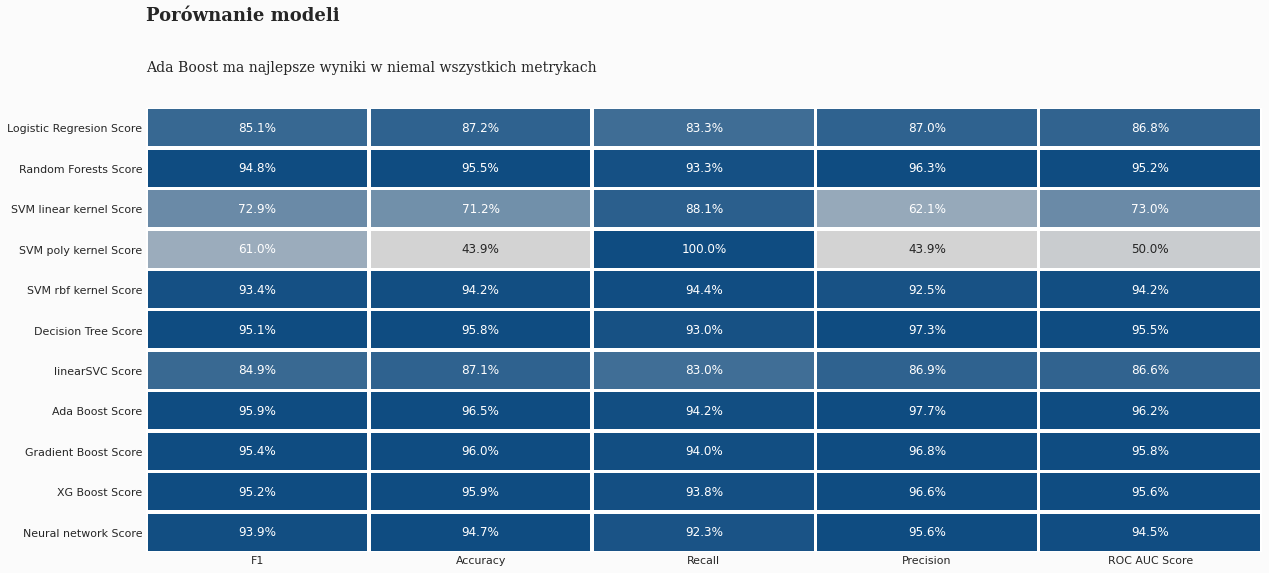

In [ ]:
df_models = round(pd.concat([logistic_regression_df,random_forests_df,svm_linear_df, svm_poly_df, svm_rbf_df, decision_tree_df, linearSVC_df, adaBoost_df, gradientBoost_df, xgBoost_df, neural_df], axis=1),11)
import matplotlib
colors = ["lightgray","lightgray","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "#fbfbfb"

fig = plt.figure(figsize=(20,45)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

ax0.text(0,-2.15,'Porównanie modeli',fontsize=18,fontweight='bold',fontfamily='serif')
ax0.text(0,-0.9,'Ada Boost ma najlepsze wyniki w niemal wszystkich metrykach',fontsize=14,fontfamily='serif')
ax0.tick_params(axis=u'both', which=u'both',length=0)


plt.show()

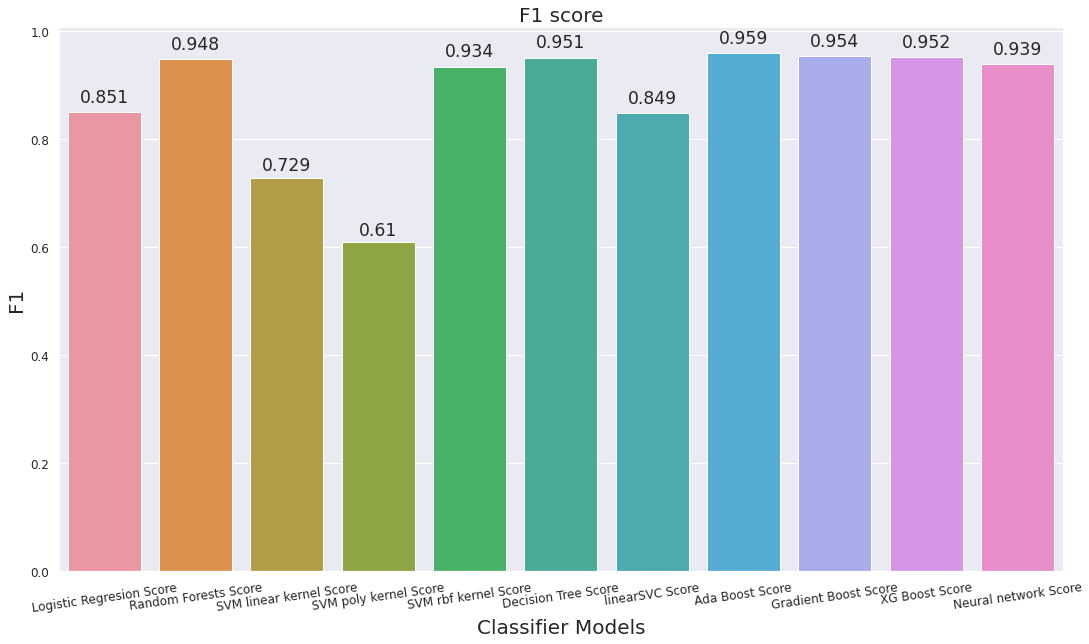

In [ ]:
plt.figure(figsize = (18,10))
ax = sns.barplot(x=df_models.columns, y=df_models.iloc[0])
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('F1', fontsize = 20)
plt.title('F1 score', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,3)}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

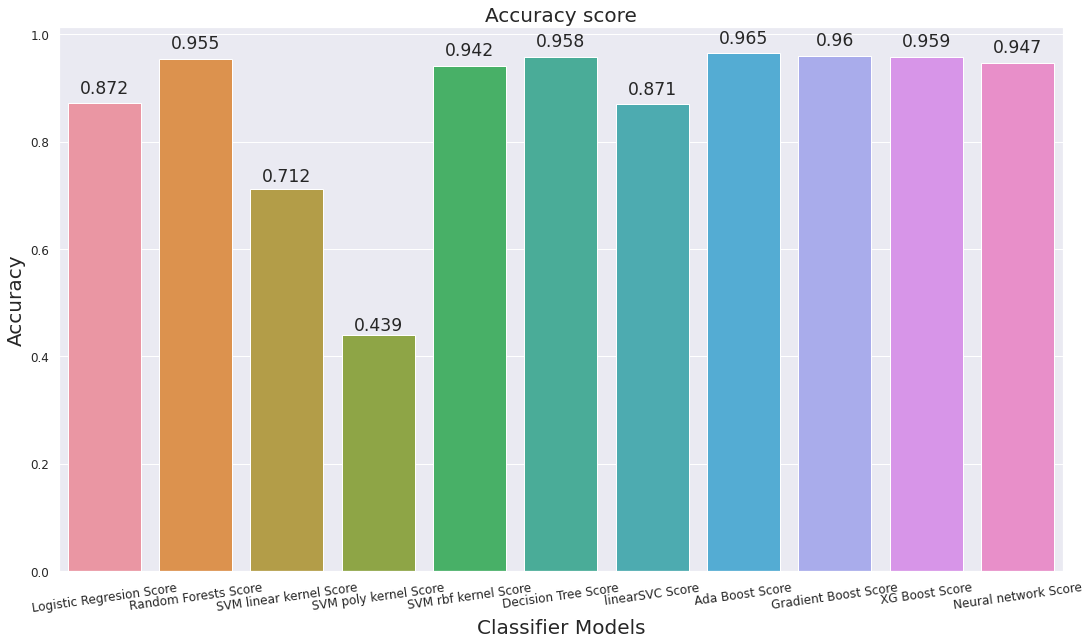

In [ ]:
plt.figure(figsize = (18,10))
ax = sns.barplot(x=df_models.columns, y=df_models.iloc[1])
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('Accuracy', fontsize = 20)
plt.title('Accuracy score', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,3)}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

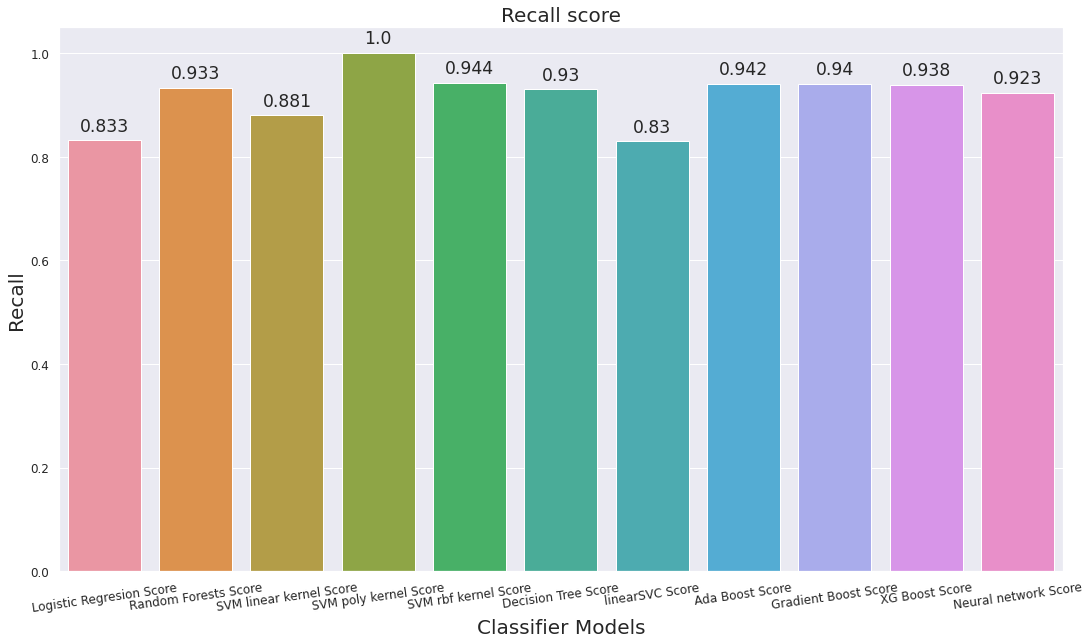

In [ ]:
plt.figure(figsize = (18,10))
ax = sns.barplot(x=df_models.columns, y=df_models.iloc[2])
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('Recall', fontsize = 20)
plt.title('Recall score', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,3)}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

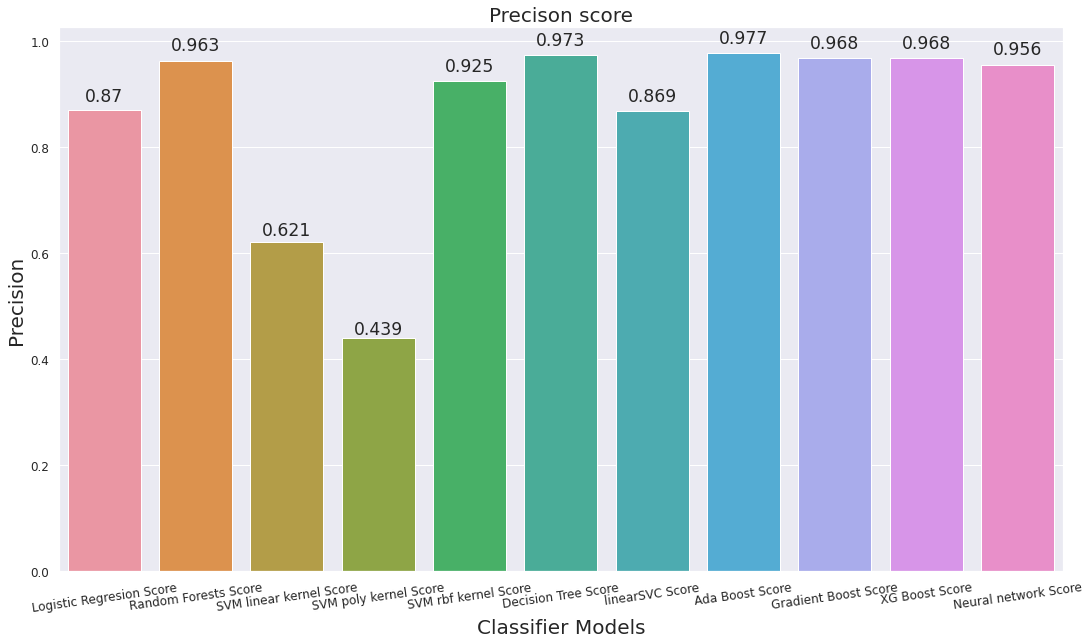

In [ ]:
plt.figure(figsize = (18,10))
ax = sns.barplot(x=df_models.columns, y=df_models.iloc[3])
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('Precision', fontsize = 20)
plt.title('Precison score', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,3)}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()